Libraries and Load Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crop_data = pd.read_csv('crop_production.csv')

# Display basic information about the dataset
print(crop_data.info())
print('\n'*5)
print(crop_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None






                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       

Handle Missing Values

In [ ]:
# Check for missing values
print(crop_data.isnull().sum())
print('\n'*5)
# Remove rows with missing production values
crop_data_clean = crop_data.dropna(subset=['Production'])
# print('\n'*5)
# Verify the cleaned dataset
print(crop_data_clean.isnull().sum())


State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64






State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


Summary Statistics

In [ ]:
# Summary statistics of numerical columns
print(crop_data_clean.describe())

# Summary statistics of categorical columns
print(crop_data_clean.describe(include=['object']))


           Crop_Year          Area    Production
count  242361.000000  2.423610e+05  2.423610e+05
mean     2005.625773  1.216741e+04  5.825034e+05
std         4.958285  5.085744e+04  1.706581e+07
min      1997.000000  1.000000e-01  0.000000e+00
25%      2002.000000  8.700000e+01  8.800000e+01
50%      2006.000000  6.030000e+02  7.290000e+02
75%      2010.000000  4.545000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09
           State_Name District_Name       Season    Crop
count          242361        242361       242361  242361
unique             33           646            6     124
top     Uttar Pradesh        TUMKUR  Kharif         Rice
freq            33189           931        94283   15082


Both numerical and categorical columns are summarized to understand the dataset's basic properties

Distribution of Crop Production

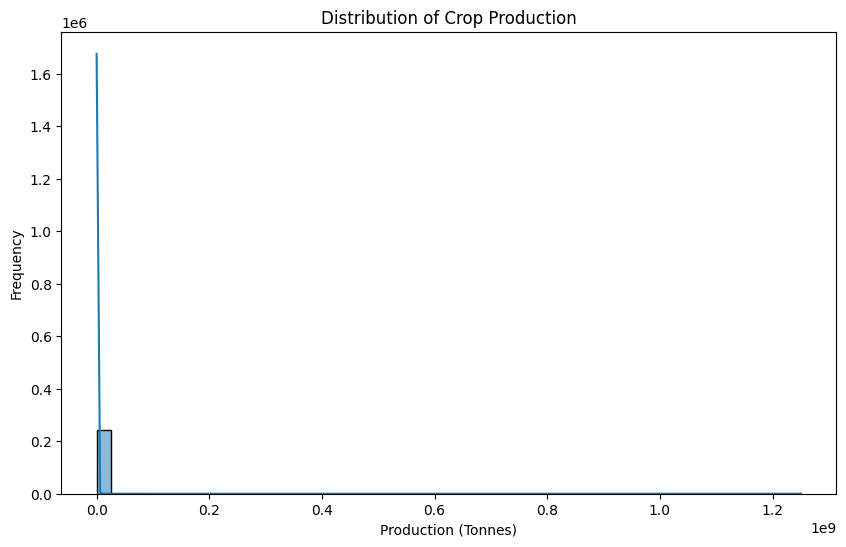

In [ ]:
# Distribution of production values
plt.figure(figsize=(10, 6))
sns.histplot(crop_data_clean['Production'], bins=50, kde=True)
plt.title('Distribution of Crop Production')
plt.xlabel('Production (Tonnes)')
plt.ylabel('Frequency')
plt.show()

A histogram illustrates the distribution of crop production values. The production data is right-skewed, with most crops having lower production values and a few with significantly higher production

Crop Production by State

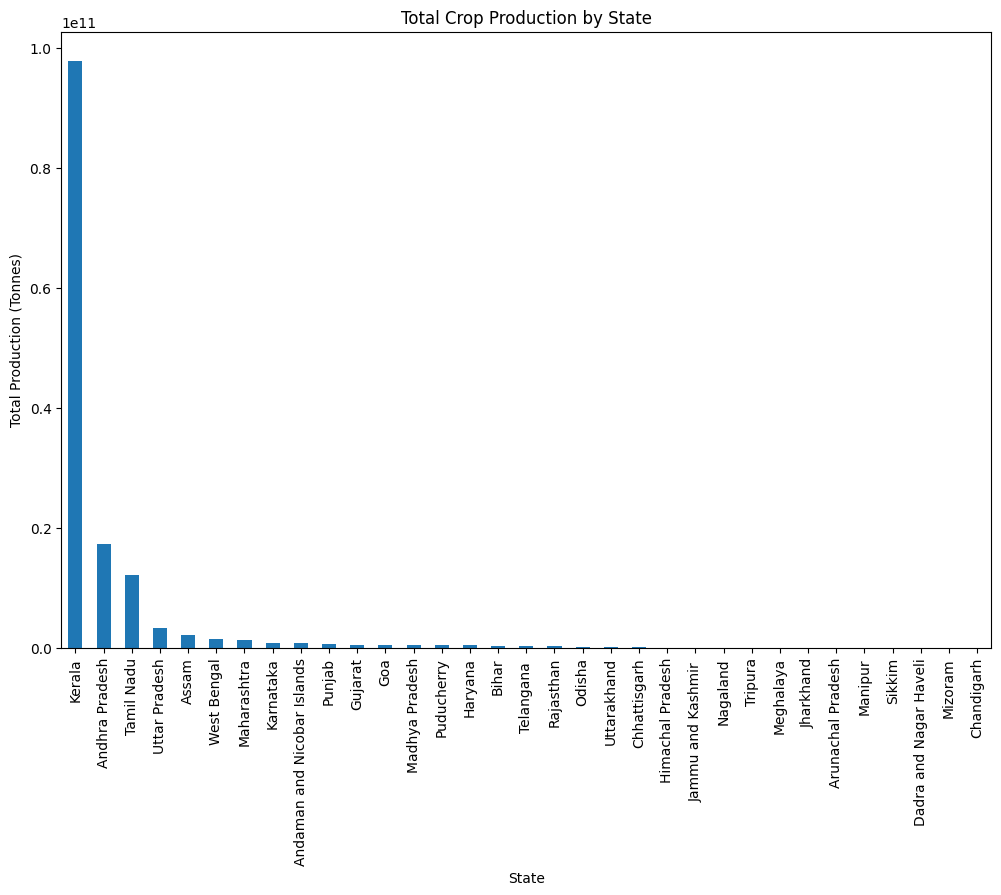

In [ ]:
# Total production by state
state_production = crop_data_clean.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
state_production.plot(kind='bar')
plt.title('Total Crop Production by State')
plt.xlabel('State')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.show()


Total crop production is aggregated by state and displayed in a bar chart States like Kerla, Andra Pradesh, and Tamil Nadu show the highest production. These states are key agricultural hubs and should be the focus of agricultural policies and investments.

Crop Production by Top 20 District

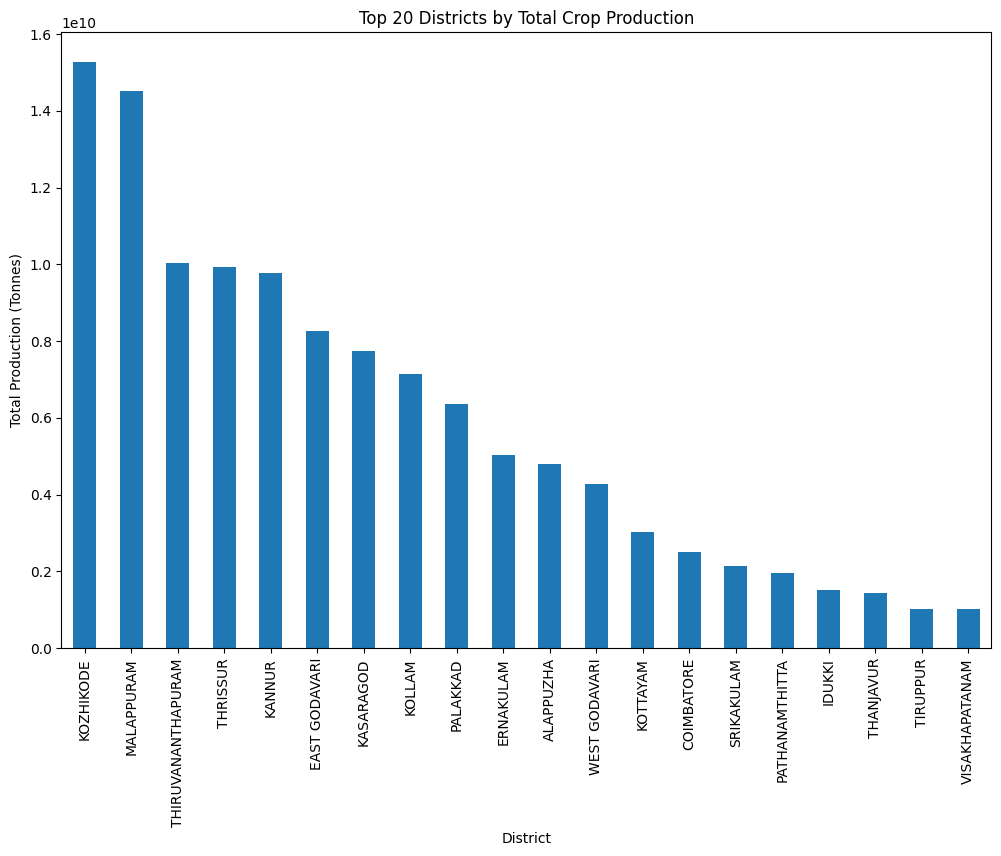

In [ ]:
# Top 20 districts by total production
district_production = crop_data_clean.groupby('District_Name')['Production'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
district_production.plot(kind='bar')
plt.title('Top 20 Districts by Total Crop Production')
plt.xlabel('District')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.show()


The top 20 districts by total production are displayed High-production districts can be targeted for infrastructure development and resource allocation

Most and Least Productive Crops

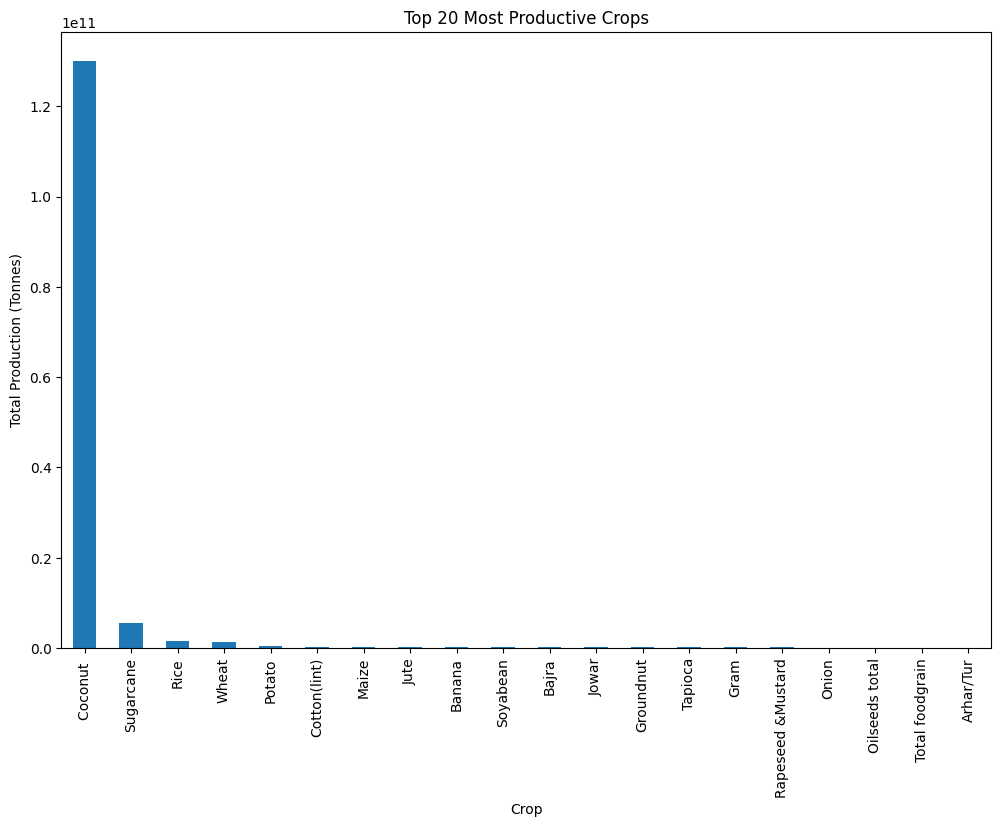

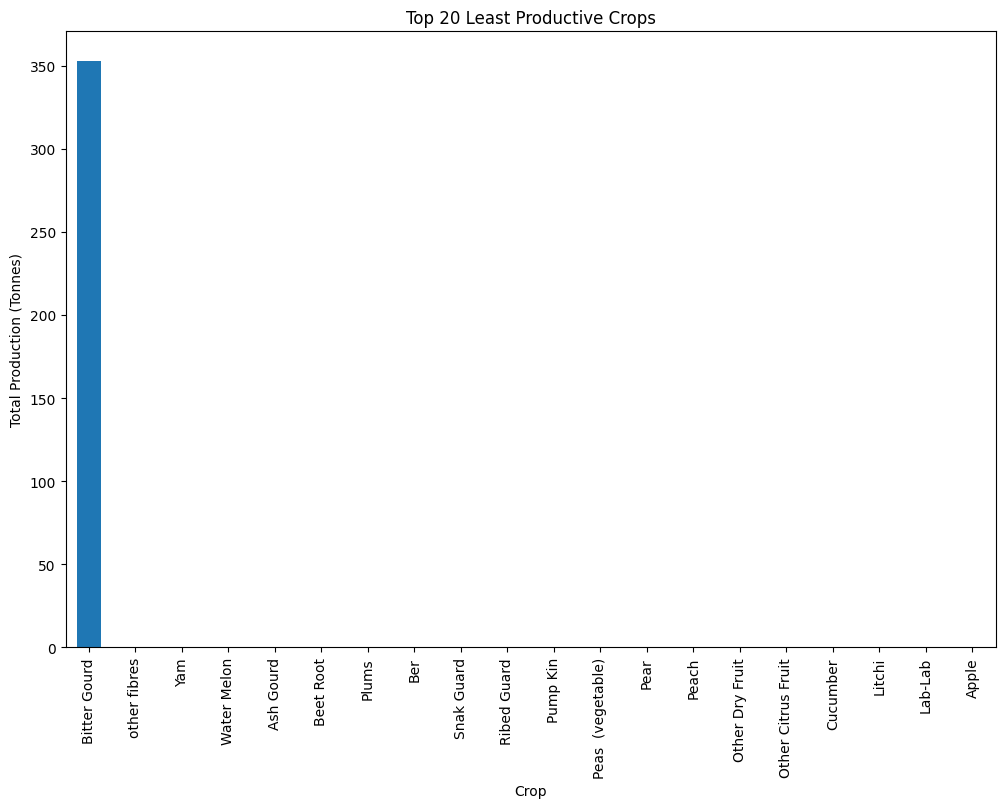

In [ ]:
# Total production by crop
crop_production = crop_data_clean.groupby('Crop')['Production'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
crop_production.head(20).plot(kind='bar')
plt.title('Top 20 Most Productive Crops')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
crop_production.tail(20).plot(kind='bar')
plt.title('Top 20 Least Productive Crops')
plt.xlabel('Crop')
plt.ylabel('Total Production (Tonnes)')
plt.xticks(rotation=90)
plt.show()


A bar plot of total production by crop identifies the most and least produced crops. Crops like Coconut Rice, Wheat, and Sugarcane dominate production, while others have minimal production.

Coconot is the most produced crop and kerala is the most crop producing state
In depth analysis

Coconot Trends Over the Years

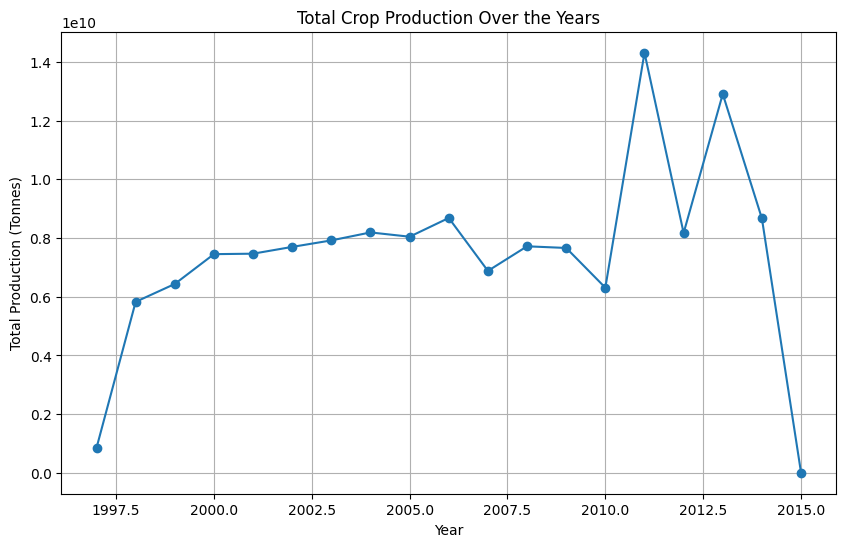

In [ ]:
# Total production by year
yearly_production = crop_data_clean.groupby('Crop_Year')['Production'].sum()

plt.figure(figsize=(10, 6))
yearly_production.plot(kind='line', marker='o')
plt.title('Total Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (Tonnes)')
plt.grid(True)
plt.show()


In [ ]:
import plotly as py
coconut = crop_data_clean[crop_data_clean['Crop']=='Coconut ']

fig = py.subplots.make_subplots(rows=1,cols=2,
                               subplot_titles=('Coconut production in different states', 'Coconut crop area in states'))

temp = coconut.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
trace0 = go.Bar(x=temp['State_Name'], y=temp['Production'])

temp = coconut.groupby(by='State_Name',)['Area'].mean().reset_index().sort_values(by='Area')
trace1 = go.Bar(x=temp['State_Name'], y=temp['Area'])

fig.append_trace(trace0, 1,1)
fig.append_trace(trace1, 1,2)
fig.show()

A focused analysis on coconut production reveals specific trends and total production amounts for this crop. This can inform decisions related to the coconut supply chain and market.

Crop Production Distribution (Excluding Coconut)

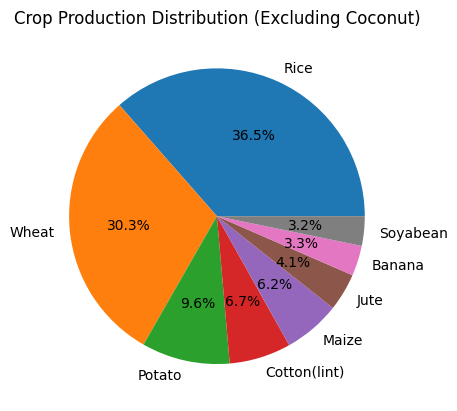

In [ ]:
new_crop_data_clean =  crop_data_clean.groupby('Crop')['Production'].sum().reset_index()
sorted_prod = new_crop_data_clean.sort_values(by='Production', ascending=False)
sorted_prod

plot_pie = sorted_prod[2:10]
# plot_pie

crop_names = plot_pie['Crop']
production_values = plot_pie['Production']

plt.pie(production_values, labels=crop_names, autopct='%1.1f%%')

plt.title('Crop Production Distribution (Excluding Coconut)')

plt.show()

Crop Production by State (Excluding Coconut and Kerla)


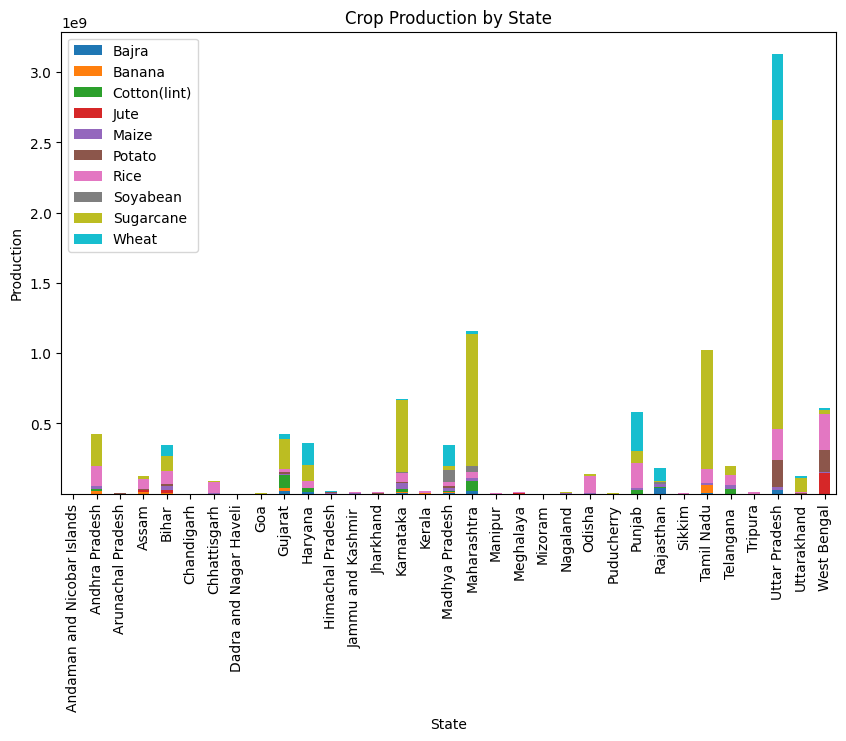

In [ ]:

top_crops = crop_data_clean.groupby('Crop')['Production'].sum().reset_index()
top_crops_sorted = top_crops.sort_values(by='Production', ascending=False)
top_10_crops = top_crops_sorted[1:11]
top_10_crops


grouped_crop_data_clean = crop_data_clean.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

top_10_crops = grouped_crop_data_clean[grouped_crop_data_clean['Crop'].isin(top_10_crops['Crop'])]

pivot_crop_data_clean = top_10_crops.pivot(index='State_Name', columns='Crop', values='Production')

pivot_crop_data_clean.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('State')
plt.ylabel('Production')
plt.title('Crop Production by State')

plt.legend()
plt.show()

Production by Season

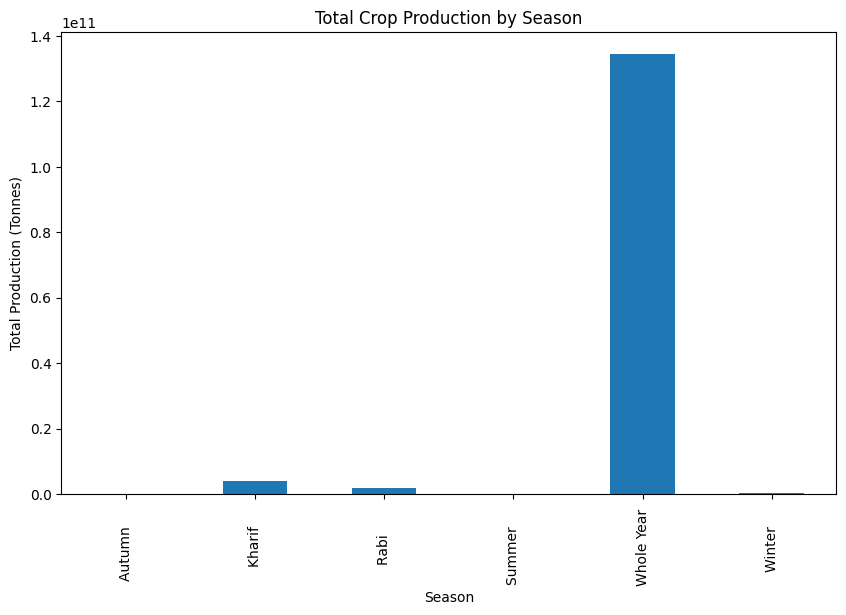

In [ ]:
# Total production by season
season_production = crop_data_clean.groupby('Season')['Production'].sum()

plt.figure(figsize=(10, 6))
season_production.plot(kind='bar')
plt.title('Total Crop Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production (Tonnes)')
plt.show()


Correlation Analysis

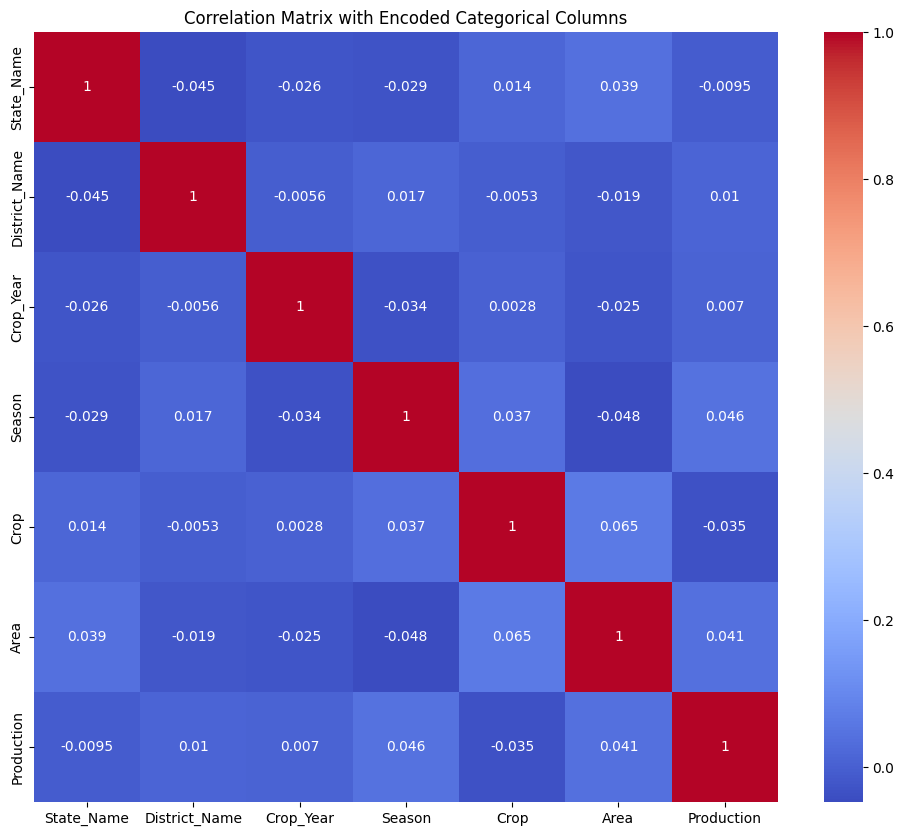

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original one
crop_data_encoded = crop_data_clean.copy()

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['State_Name', 'District_Name', 'Season', 'Crop']:
    crop_data_encoded[column] = label_encoder.fit_transform(crop_data_encoded[column])

# Display correlation matrix for the encoded dataset
plt.figure(figsize=(12, 10))
sns.heatmap(crop_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Categorical Columns')
plt.show()


Heatmap for Production by State and Year

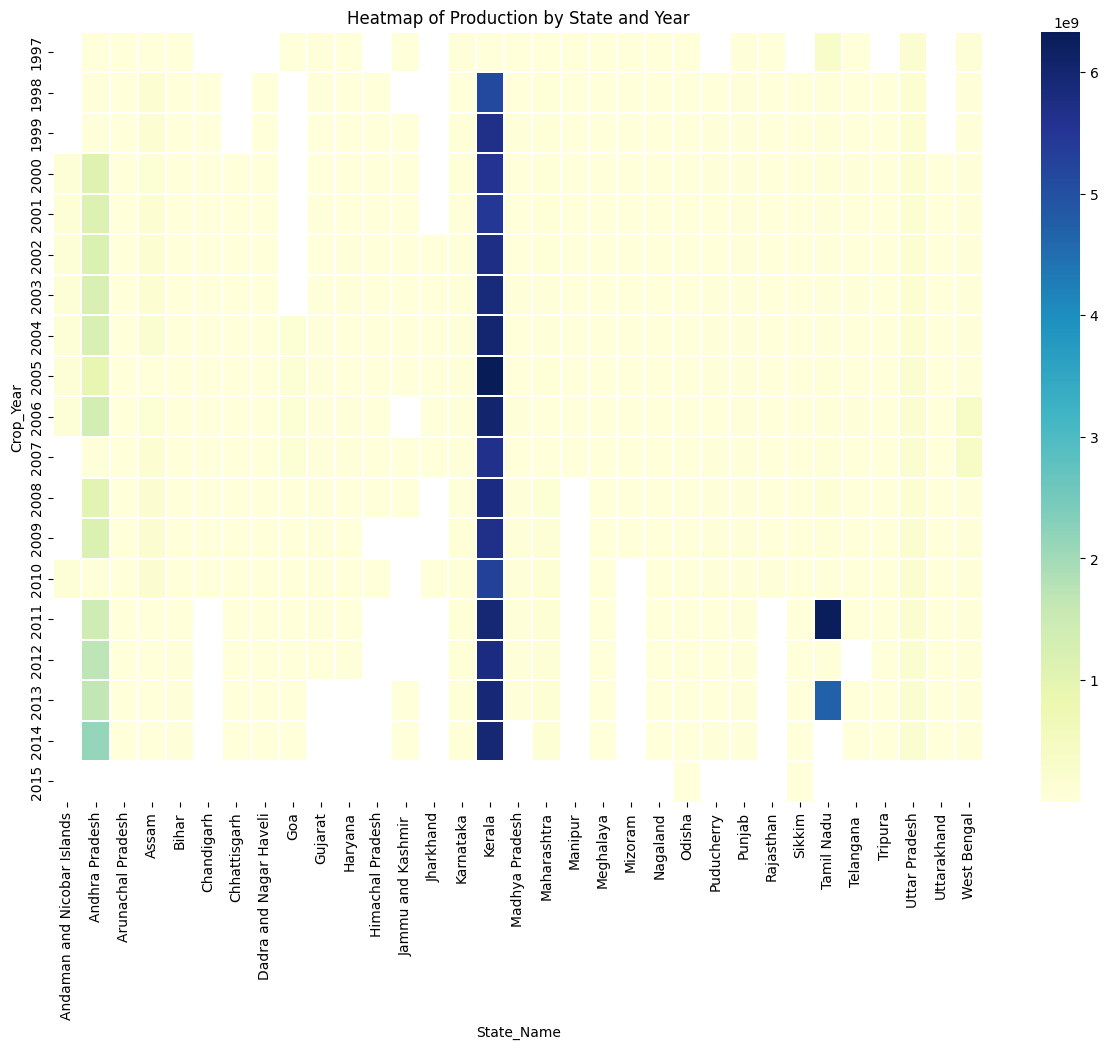

In [ ]:
# Pivot table for heatmap
pivot_table = crop_data_clean.pivot_table(values='Production', index='Crop_Year', columns='State_Name', aggfunc='sum')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', linecolor='white', linewidths=0.1)
plt.title('Heatmap of Production by State and Year')
plt.show()


The heatmap reveals production trends and variations over time. Identifying growth or decline trends can inform long-term agricultural strategies.

Time Series Analysis

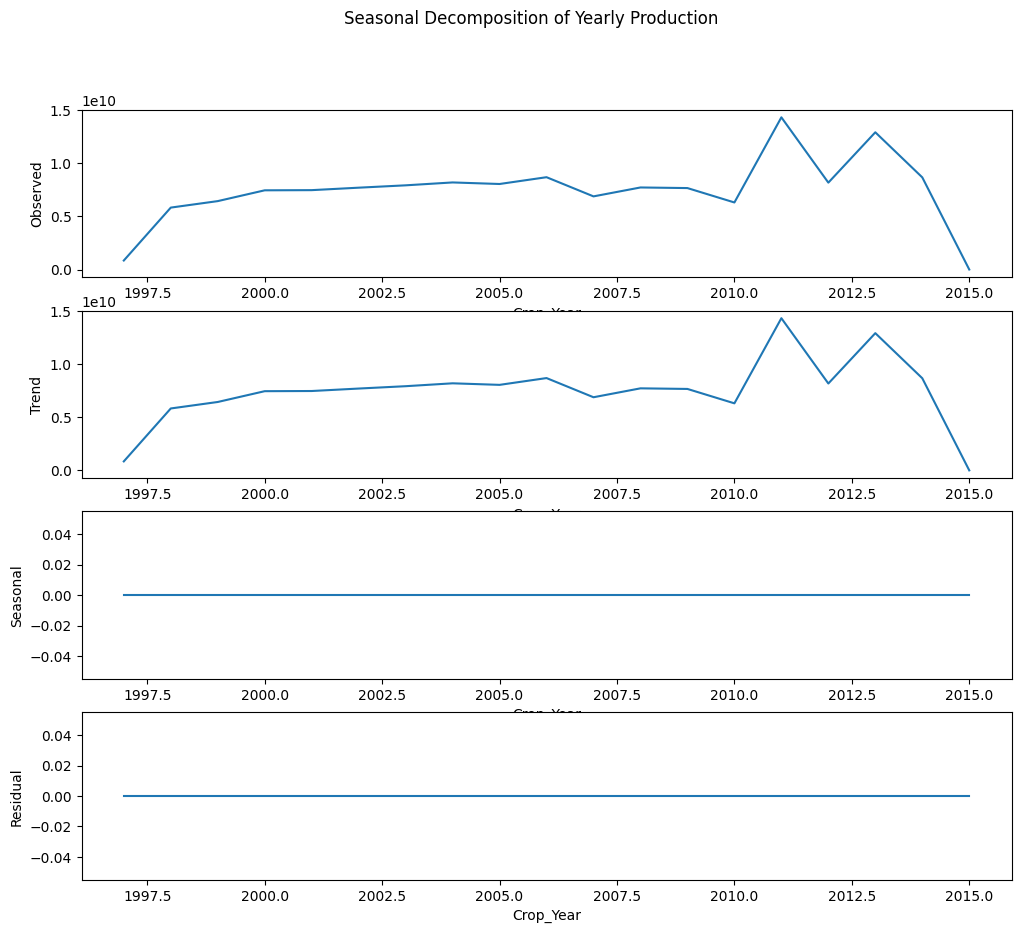

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregating production by year
yearly_production = crop_data_clean.groupby('Crop_Year')['Production'].sum()

# Seasonal decomposition
decomposition = seasonal_decompose(yearly_production, model='additive', period=1)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.suptitle('Seasonal Decomposition of Yearly Production')
plt.show()


Hypothesis Testing

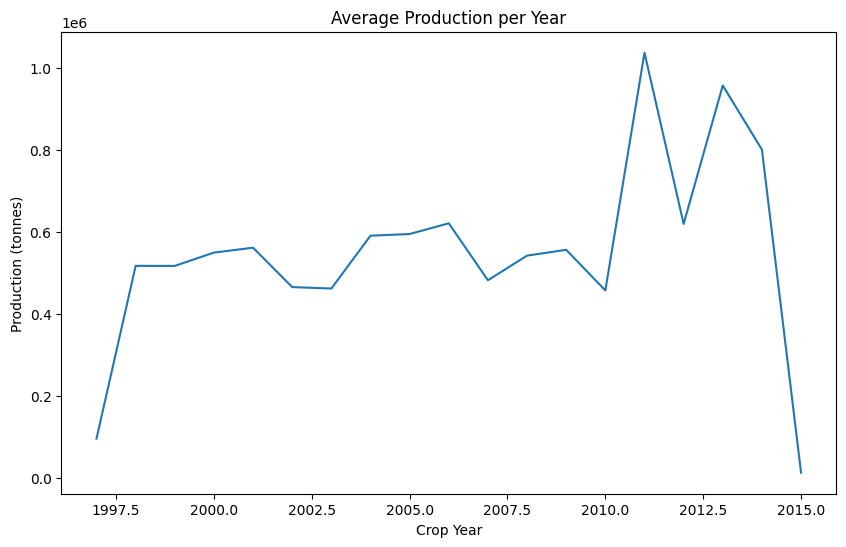

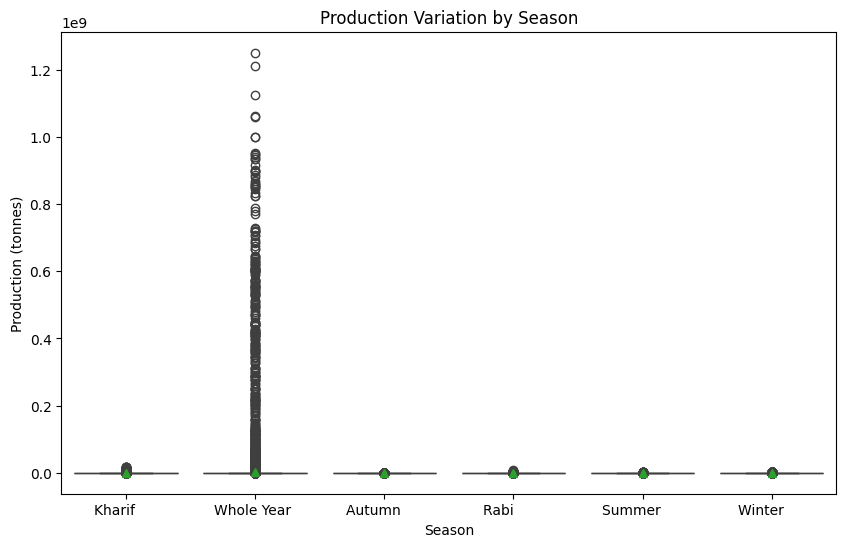

In [ ]:
plt.figure(figsize=(10, 6))
crop_data_clean.groupby('Crop_Year')['Production'].mean().plot()
plt.title("Average Production per Year")
plt.xlabel("Crop Year")
plt.ylabel("Production (tonnes)")
plt.show()

# Seasonal variations (boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(
    x = "Season",
    y = "Production",
    showmeans=True,
    data=crop_data_clean
)
plt.title("Production Variation by Season")
plt.xlabel("Season")
plt.ylabel("Production (tonnes)")
plt.show()

This plot shows overall trends, including periods of growth or decline in average production. While initial calculations suggested 2011 as the peak year for crop production and 2015 as the low point, a closer look at the data reveals a potential issue with the 2015 figures. The data for that year appears to be inaccurate or incomplete, making it a less reliable indicator of the actual lowest production year. Based on the plot, 2002 is a stronger candidate for the year with the lowest crop yield.

Average Crop Area through years

In [ ]:
import plotly.express as px
temp = crop_data_clean.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

Relationship between crop area and year is visualized. This helps in understanding how the area under cultivation has changed over time

Most and Least crop producing districts

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots # Import make_subplots directly


fig = py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = crop_data_clean.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()
del temp,temp1

Comparative view of highest and lowest production.

The dominance of districts like Malappuram, Thiruvananthapuram, Thrissur, Thiruvananthapuram, and Kannur in crop production highlights a key trend:  Kerala, located in southern India, is a significant contributor to the nation's agricultural output.

No Production Crops

In [ ]:
temp = crop_data_clean.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
temp[temp['Production']==0]


,Crop,Production
0,Apple,0.0
79,Pear,0.0
72,Other Dry Fruit,0.0
71,Other Citrus Fruit,0.0
80,Peas (vegetable),0.0
84,Plums,0.0
89,Pump Kin,0.0
58,Litchi,0.0
54,Lab-Lab,0.0
94,Ribed Guard,0.0


Identifying crops with zero production. These crops need further investigation to determine causes such as pests, diseases, or adverse weather conditions. Helps in taking preventive measures to avoid such issues in the future.

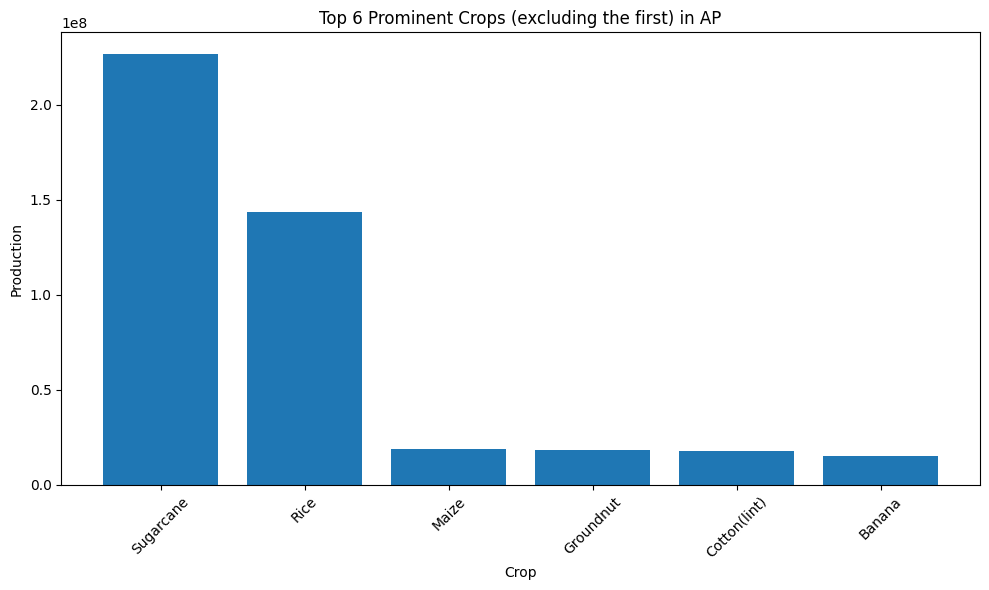

In [ ]:
crop_data_clean1 = crop_data_clean
kerala_data = crop_data_clean1[crop_data_clean1['State_Name'] == 'Andhra Pradesh']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

plt.figure(figsize=(10, 6))
plt.bar(top_6_crops['Crop'], top_6_crops['Production'])
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Top 6 Prominent Crops (excluding the first) in AP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
state_production['Kerala']/state_production['Andhra Pradesh']


5.649775475400368

Production in Kerela(largest producer) is 5.6 times higher than Andhra Pradesh(second largest producer)
Some possible factors that contribute to high agricultural production in Kerala

1.Favorable Climate: Year-round warmth, high rainfall, and humidity create an ideal growing environment for diverse crops

2.Skilled Farmers: A well-educated and experienced farming community drives productivity

3.Sustainable Practices: Organic and intercropping methods promote higher yields and environmental responsibility.

4.Efficient Irrigation: A network of rivers, canals, and reservoirs ensures consistent water availability.

5.Rich Soils: Soils provide a nutrient-rich foundation for optimal crop yields.

# **India Crop Production Analysis Key Findings**

**Dominant Crops and Production Trends**

*   Coconut reigns supreme as the most produced crop in India, followed by Sugarcane, Rice, Wheat, and Potato. Notably, Coconut and Sugarcane exhibit significantly higher production volumes compared to other crops.
*  Analysis of production years suggests a peak around 2011, with the lowest yield observed around 2002. A dip in production for 2015 may be attributed to potential data recording issues, requiring further investigation.

**Geographical Distribution of Production**


*   Kerala leads the nation in total crop production, primarily due to its dominant position in Coconut cultivation.

*   Other leading crop-producing states include Andhra Pradesh, Tamil Nadu, Uttar Pradesh, Assam, and West Bengal.

**Factors Influencing Crop Productivity**
*   Land area exhibits no significant correlation with crop production. Instead, factors like irrigation facilities and employed farming techniques exert a greater influence on crop yields.

**State-Specific Crop Profiles**
* Sugarcane and Rice are the prominent crops in Andhra Pradesh, with comparable production quantities. Maize, Groundnut, Cotton, and Banana hold lower production shares.
* Kerala's crop landscape features Coconut as the undisputed leader, followed by Tapioca, Rice, Banana, and Sugarcane.
* Within Kerala, Malappuram district boasts the highest crop production, followed by Thiruvananthapuram, Thrissur, and Kannur districts. Notably, southern states contribute significantly to overall national crop production due to their high Coconut output.


**Top 15 Crops by Production**
* Coconut, Sugarcane, Rice, Wheat, and Potato are succeeded by Cotton, Maize, Jute, Banana, Soybean, Bajra, Jowar, Groundnut, Tapioca, and Gram to round out the top 15 crops by production volume in India
